<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #2f0000ff, #690202ff); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Lab 2 Day 21/8
    </h1>
</div>


<h4 style="color:#6c0e0eff">1. Importing CIFAR-10 Dataset, Utility Functions, and Keras Modules for Building CNN Models</h4>

In [50]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import zipfile


<h4 style="color:#6c0e0eff">2. Loading a Pretrained CNN Model from Saved File (cnn_model.h5)</h4>

In [51]:
model_loaded = keras.models.load_model('model.h5')

<h4 style="color:#6c0e0eff">3. Loading and Normalizing CIFAR-10 Training and Testing Data</h4>

In [52]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

<h4 style="color:#6c0e0eff">4. One-Hot Encoding CIFAR-10 Labels and Displaying Dataset Shapes</h4>

In [53]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print('x_train shape: ',x_train.shape)
print('x_train test: ',x_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_train test:  (10000, 32, 32, 3)


<h4 style="color:#6c0e0eff">5. Visualizing Sample Images from CIFAR-10 Test Set with Class Labels</h4>

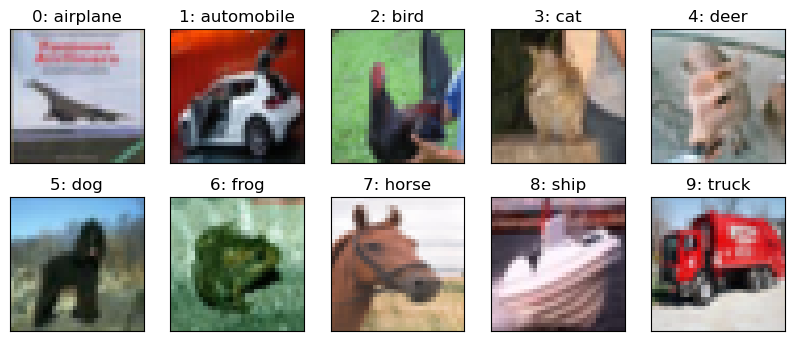

In [54]:
(_, _), (_, labels) = cifar10.load_data()
idx = [3, 6, 25, 46, 58, 85, 93, 99, 108, 133]
clsmap = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4: 'deer',
    5: 'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}
plt.figure(figsize = (10,4))
for i, (img, y) in enumerate(zip(x_test[idx].reshape(10,32,32,3), labels[idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img,cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y[0]) + ": "+ clsmap[y[0]])
plt.show()

<h4 style="color:#6c0e0eff">6. Initializing a Sequential CNN Model</h4>

In [55]:
model1 = models.Sequential()

<h4 style="color:#6c0e0eff">7. Building a Custom CNN Classifier with Convolution, Pooling, Batch Normalization, Dropout, and Dense Layers</h4>

In [56]:
inpt_dim = (32,32,3)
inpt_img= Input(shape=inpt_dim)

c11 = Conv2D(64,(9,9), strides=(2,2), input_shape = inpt_dim, activation='relu')(inpt_img)

p12 = MaxPooling2D(pool_size = (2,2))(c11)

bn13 = BatchNormalization()(p12)

c14 = Conv2D(128,(3,3), strides=(1,1), activation='relu')(bn13)

p15 = MaxPooling2D(pool_size = (2,2))(c14)

bn16 = BatchNormalization()(p15)

f17 = Flatten()(bn16)

do18 = Dropout(0.5)(f17)

d19 = Dense(units = 256,activation = 'relu')(do18)

do110 = Dropout(0.2)(d19)

d111 = Dense(units = 64, activation = 'relu')(do110)

do112 = Dropout(0.1)(d111)

output= Dense(units = 10, activation='sigmoid')(do112)

classifier = Model(inpt_img, output)

<h4 style="color:#6c0e0eff">8. Compiling the Custom CNN Model with RMSprop Optimizer and Binary Crossentropy Loss</h4>

In [57]:
opt = RMSprop(learning_rate=0.001)
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
print(classifier.summary())

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        15,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,666 (932.29 KB)

 Trainable params: 238,282 (930.79 KB)

 Non-trainable params: 384 (1.50 KB)

None


<h4 style="color:#6c0e0eff">9. Training the Custom CNN Model with Callbacks: EarlyStopping, Learning Rate Reduction, and Model Checkpointing</h4>

In [58]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, 
                            min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                        restore_best_weights=True, verbose=1)

checkpoint_filepath = 'cnn_model.h5'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

hist = classifier.fit(x_train, y_train, batch_size=512, epochs=10, 
                callbacks=[stop_alg, reduce_lr, model_checkpoint], shuffle=True, 
                validation_data=(x_test, y_test))


Epoch 1/10
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2411 - loss: 0.3642

98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3065 - loss: 0.3043 - val_accuracy: 0.2546 - val_loss: 0.3652 - learning_rate: 0.0010
Epoch 2/10
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4077 - loss: 0.2540

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4217 - loss: 0.2488 - val_accuracy: 0.2597 - val_loss: 0.2836 - learning_rate: 0.0010
Epoch 3/10
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4711 - loss: 0.2319

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4727 - loss: 0.2303 - val_accuracy: 0.3698 - val_loss: 0.2600 - learning_rate: 0.0010
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5042 - loss: 0.2184 - val_accuracy: 0.2634 - val_loss: 0.3387 - learning_rate: 0.0010
Epoch 5/10
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5255 - loss: 0.2105

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5295 - loss: 0.2092 - val_accuracy: 0.4261 - val_loss: 0.2669 - learning_rate: 0.0010
Epoch 6/10
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5485 - loss: 0.2023

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5507 - loss: 0.2012 - val_accuracy: 0.4723 - val_loss: 0.2286 - learning_rate: 0.0010
Epoch 7/10
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5621 - loss: 0.1967

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5648 - loss: 0.1952 - val_accuracy: 0.5058 - val_loss: 0.2152 - learning_rate: 0.0010
Epoch 8/10
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5796 - loss: 0.1890

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5816 - loss: 0.1888 - val_accuracy: 0.5524 - val_loss: 0.1972 - learning_rate: 0.0010
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5947 - loss: 0.1835 - val_accuracy: 0.4803 - val_loss: 0.2324 - learning_rate: 0.0010
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6092 - loss: 0.1793 - val_accuracy: 0.4878 - val_loss: 0.2339 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 8.


<h4 style="color:#6c0e0eff">10. Saving the Weights of the Trained CNN Model to File (cnn1.weights.h5)</h4>

In [59]:
classifier.save_weights("cnn1.weights.h5")


<h4 style="color:#6c0e0eff">11. Importing Required Libraries for Building and Training a (CNN) with TensorFlow/Keras for Image Processing</h4>

In [60]:
classifier.load_weights('cnn1.weights.h5')

<h4 style="color:#6c0e0eff">12. Loading Saved Weights into the CNN Model from File (cnn1.weights.h5)</h4>

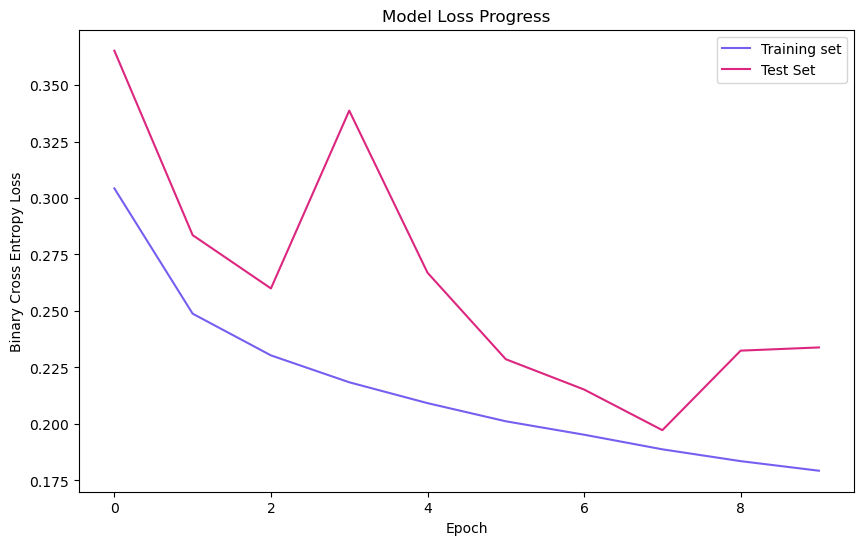

In [61]:
fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training set','Test Set'], loc='upper right')
plt.show()

<h4 style="color:#6c0e0eff">13. Loading CNN Weights from File (cnn.hdf5) and Compiling the Model with Categorical Crossentropy Loss</h4>

In [68]:
classifier.load_weights('CNN.hdf5')
classifier.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Layer count mismatch when loading weights from file. Model expected 7 layers, found 19 saved layers.

<h4 style="color:#6c0e0eff">14.Evaluating CNN Performance Using Classification Report, Confusion Matrix, and Balanced Error Rate (BER)</h4>

In [69]:
(_, _),(_, labels) = cifar10.load_data()
y_ = labels
y_hat = classifier.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)

print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_hat, axis=1), labels=[0,1,2,3,4,5,6,7,8,9]))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0,1,2,3,4,5,6,7,8,9])
print(cm)

ber = 1-balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1))
print('BER', ber)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.56      0.63      1000
           1       0.82      0.58      0.68      1000
           2       0.70      0.15      0.24      1000
           3       0.42      0.36      0.39      1000
           4       0.39      0.65      0.49      1000
           5       0.54      0.39      0.46      1000
           6       0.83      0.46      0.59      1000
           7       0.42      0.82      0.56      1000
           8       0.63      0.79      0.70      1000
           9       0.59      0.76      0.66      1000

    accuracy                           0.55     10000
   macro avg       0.61      0.55      0.54     10000
weighted avg       0.61      0.55      0.54     10000

[[558  20  14   8  84   6   7  83 160  60]
 [ 25 579   0  12  14   5   6  53  57 249]
 [ 71   7 147  86 346  76  37 168  34  28]
 [  9  11  17 362 148 148  16 188  56  45]
 [ 16   1   6  51 652  14  1

<h4 style="color:#6c0e0eff">15. Visualizing Learned Filters from the First Convolutional Layer of the CNN</h4>

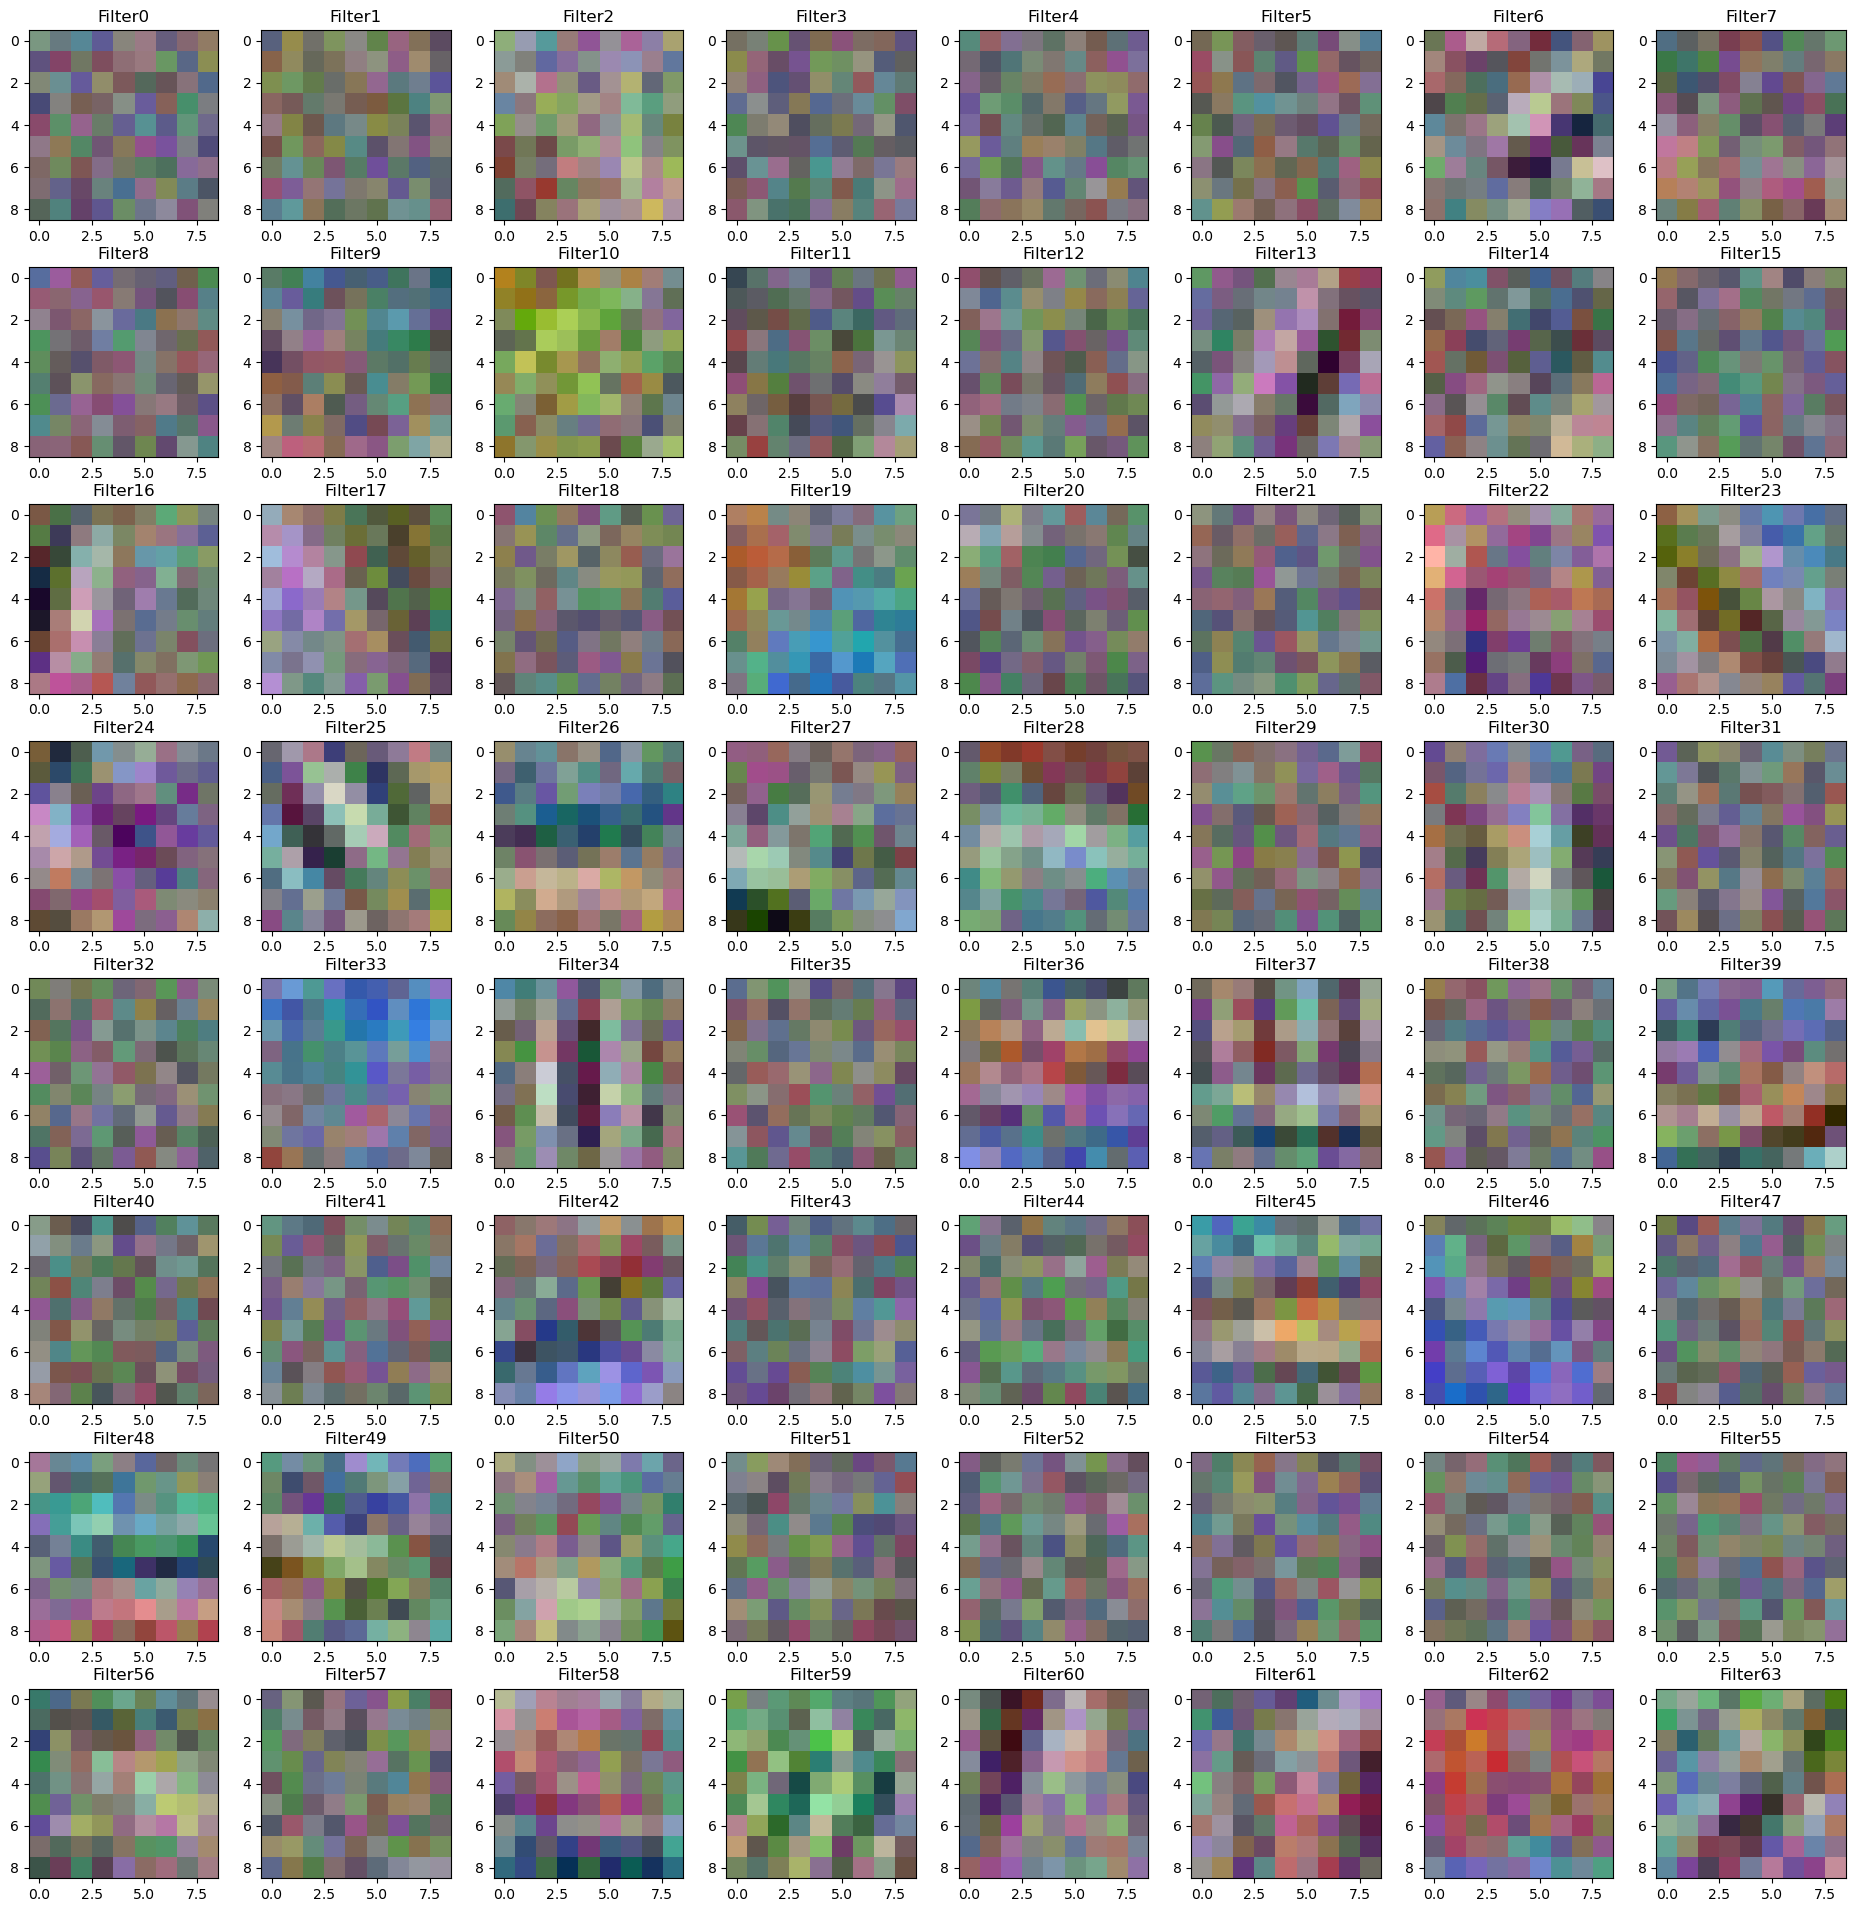

In [70]:
cnn11 = classifier.layers[1].name 
w =classifier.get_layer(name=cnn11).get_weights()[0] 
wshape = w.shape 
scaler = MinMaxScaler()
scaler.fit(w.reshape(-1,1))
w = scaler.transform(w.reshape(-1,1))
w = w.reshape(wshape)
fig,axs = plt.subplots(8,8,figsize=(24,24))
fig.subplots_adjust(hspace=.25, wspace=.001)
axs = axs.ravel()
for i in range(w.shape[-1]):
  h=np.reshape(w[:,:,:,i],(9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter'+str(i))